# Average color and Dominant color

The average colour is the sum of all pixels divided by the number of pixels. However, this approach may yield a colour different to the most prominent visual color. What you might really want is dominant color rather than average colour.

In [11]:
# Average colour
import cv2 as cv
import numpy as np

img = cv.imread('Images/ER.jpg')  # shape: (H, W, 3)

# conver to rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

average_color = img_rgb.mean(axis=(0, 1))  # average over height and width
print(average_color)



[124.80887654  79.76083333  48.66283704]


In [ ]:
# dominant


# reshape to flat 2D of pixels
pixels = np.float32(img_rgb.reshape((-1,3))) # flatten from 3D to 2D array
# cv.kmeans require float32

n_colours = 5
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 200, .1)
# stopping criteria to kmeans
# cv.TERM_CRITERIA_EPS: Stop if the accuracy (epsilon) is good enough

# cv.TERM_CRITERIA_MAX_ITER: Stop after max iterations

# 200: Max iterations

# 0.1: Minimum accuracy change (epsilon)


flags = cv.KMEANS_RANDOM_CENTERS # choose initial cluster centers randomly

_, labels, palette = cv.kmeans(pixels, n_colours, None, criteria, 10, flags) # runs algo 10 time
# labels: Array of shape (num_pixels, 1), indicating which cluster each pixel belongs to
# Array of shape (n_colours, 3) → the RGB colors of each cluster center



_, counts = np.unique(labels, return_counts=True) # counts: show how many pixels fall into each color group


dominant = palette[np.argmax(counts)]
dominant

array([45.03714 , 25.85413 , 18.290665], dtype=float32)

### Example of what happens in .reshape()

Image represented in 3D array normally
img = np.array([
    [ [255, 0, 0], [0, 255, 0], [0, 0, 255] ]
])
Shape: (1, 3, 3)
→ 1 row, 3 columns, 3 channels (RGB)

When undergo reshape.(-1, 3) - the goal is to make it become 2D
-1: Figure the number of rows automatically
3: each row has 3 values - RGB

#### Result
array([
    [255,   0,   0],  # Red pixel
    [  0, 255,   0],  # Green pixel
    [  0,   0, 255]   # Blue pixel
])


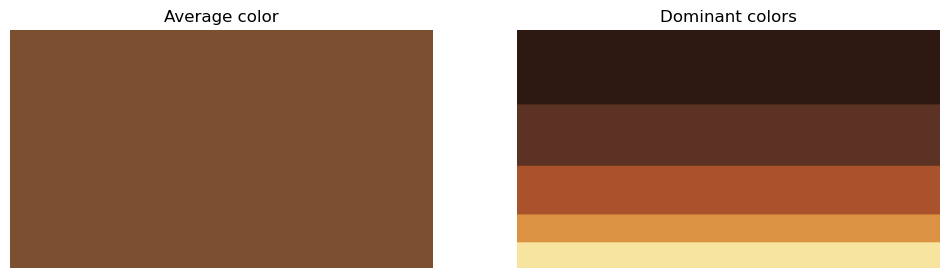

In [ ]:
# generate the figure - understand more of this later
import matplotlib.pyplot as plt

avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average_color)

indices = np.argsort(counts)[::-1]   
freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)